# Housing

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing and inspecting data

The file `housing.csv` resides in same folder as this Jupyter script


In [ ]:
housing_original = pd.read_csv("housing.csv")

Looking at the first few lines of the tabular data in the dataframe.

We see 10 columns. All of them are numeric except the `ocean_proximity` column

In [ ]:
housing_original.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Using the `housing_original.info()` we can see that actually the first  9 (out of the ten) columns contain numeric values of float type. Only the last (10th) column is non-numeric

Furthermore we see that the dataframe has 20640 rows where of 20639 are data-rows and one column heads 

In [ ]:
housing_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We like to check which rows have at least one NaN (as these rows can/will cause troubles later). 

Lets use `.isnull().any(axis=1)`to check all columns for each rows.

In [ ]:
housing_original[housing_original.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


We see that 207 rows have at least one invalid value. As these rows will interfere with upcoming calculations we like to remove them.

As it is best bractice to never work on the original data, we create a new dataframe based on "housing_original" and while doing that also dropping the rows with invalid data (having NaNs) using the `.dropna()`method in the `dataframe`.

In [58]:
housing = housing_original.dropna()

Lets take a closer look at `housing` dataframe

In [59]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [60]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


`housing.describe()` gives an overview of the dataframe and the data it contains. Such as e.g. min, max and mean value per column

## Visualizations

In order for the "plotting functions/methods" to work directly using Pandas' dataframes one need to have matplotlib imported

<Axes: xlabel='longitude', ylabel='latitude'>

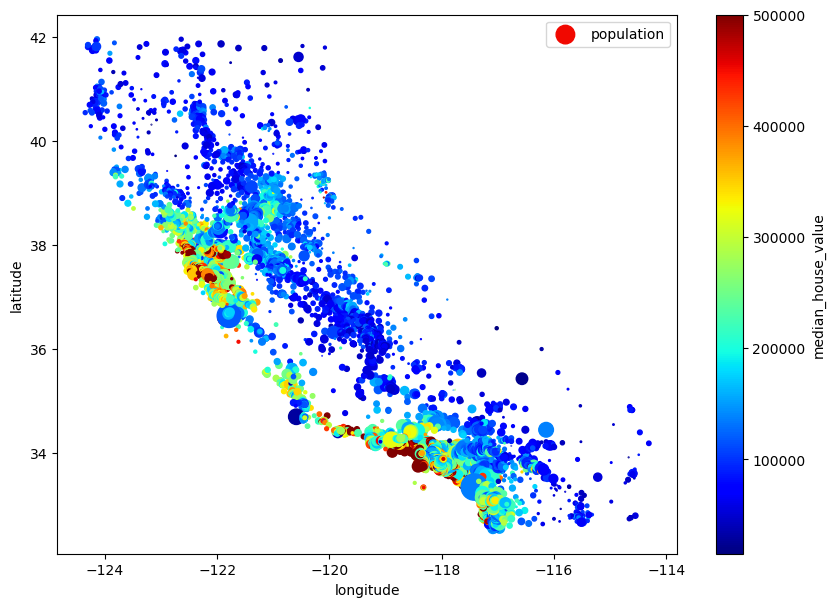

In [ ]:
housing.plot(kind="scatter", 
             x="longitude", 
             y="latitude", 
             alpha=1.0,
             s=housing["population"]/100, 
             label="Population", 
             figsize=(10,7),
             c="median_house_value", 
             cmap=plt.get_cmap("jet"), 
             colorbar=True,
             sharex=False)

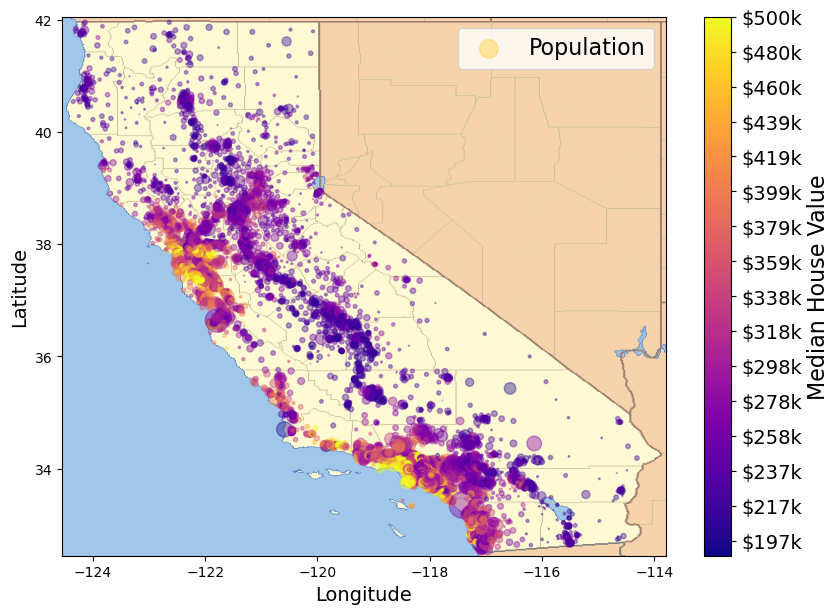

In [ ]:
import matplotlib.image as mpimg

# the picture file is in the samae folder as the script
california_img=mpimg.imread('california.png')

ax = housing.plot(kind="scatter", 
                  x="longitude", 
                  y="latitude", 
                  figsize=(10,7),
                  s=housing['population']/100, 
                  label="Population",
                  c="median_house_value", 
                  cmap=plt.get_cmap("plasma"),
                  colorbar=False, 
                  alpha=0.4)


plt.imshow(california_img, 
           extent=[-124.55, -113.80, 32.45, 42.05], 
           alpha=1.0,
           cmap=plt.get_cmap("plasma"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]

# "calculate" the tick marks numerical values for use on the color bar
# 
tick_values = np.linspace(prices.min(), prices.max(), 25)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16) # This affect the string given as "label" in the housing.plot() above

In [52]:
# Create a dataframe without the column "ocean_proximity" thus keeping the numerical columns only
# this way we can check the correlation between the differnet columns
housing_numeric = housing.drop(columns=['ocean_proximity'])

# Create a correlation matrix using "housing_numeric"
corr_matrix = housing_numeric.corr()

# present how large correlation the columns have in relation to "median_house_value"
# +1.0 means perfect correlation
#  0.0 means no correlation
# -1.0 means perfect inverse correlation
# present the columns from the most to the least correlation
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

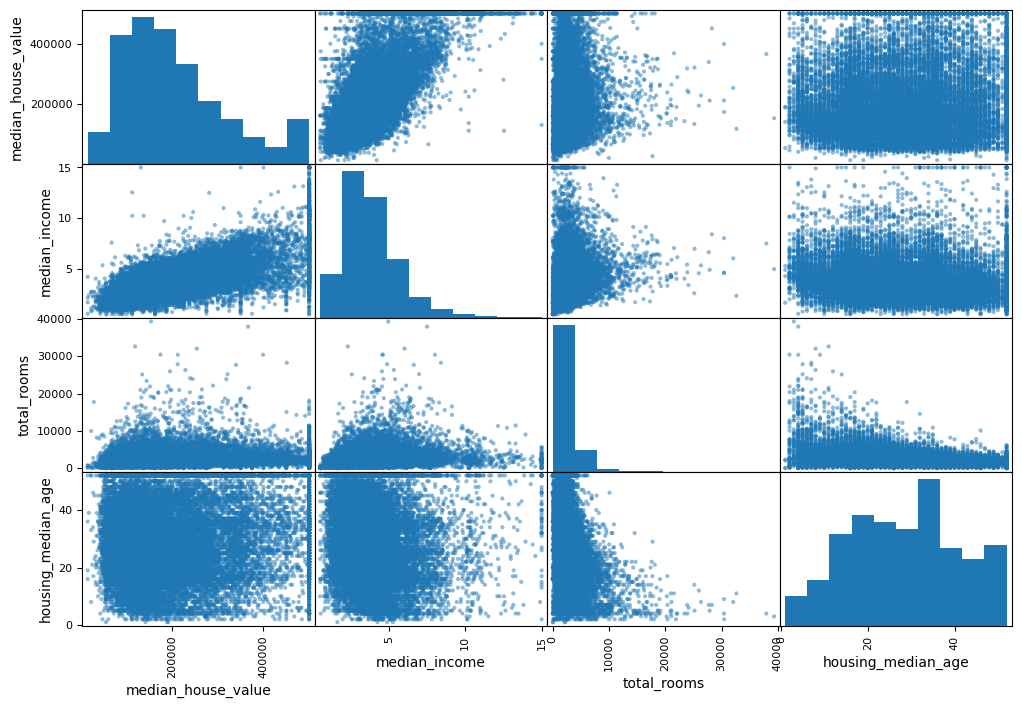

In [ ]:

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

# create a subset dataframe to ease the visualize the column values in ralation to other coumns
housing_subset = housing[attributes]

pd.plotting.scatter_matrix(housing_subset, figsize=(12, 8))
# The diagonal show the histogram for the values in that column

# a perfect correlation between two columns would be seen as line from bottom left to top right
# no correlation would be presented as well distributed (like random) dots

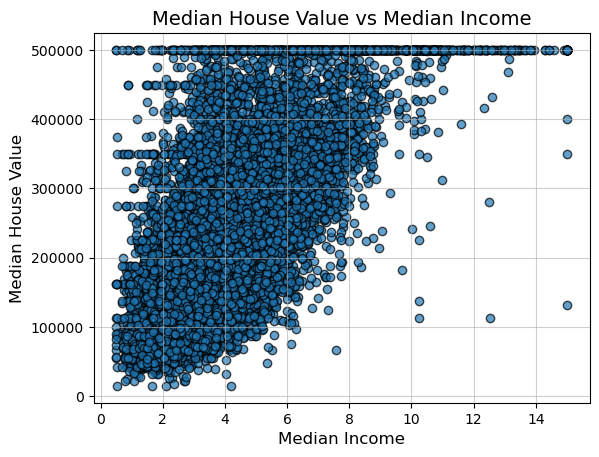

In [ ]:
# Let's use matplotlib's puplot to render a scatter diagram based on "median_income" and "median_house_value"
plt.scatter(housing['median_income'], housing['median_house_value'], alpha=0.7, edgecolor='k')
plt.title('Median House Value vs Median Income', fontsize=14)
plt.xlabel('Median Income', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)
plt.grid(True, alpha=0.6)